In [1]:
%matplotlib inline
from IPython.display import display,Math
from sympy import *
init_session()

IPython console for SymPy 1.8 (Python 3.7.10-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.8/



In [2]:
mykeys = [ i for i in range(33)]
myvalues = [" "]+[chr(i) for i in range(65, 65+26)]+[".",",","'",'"',"(",")"]
mydict = dict(zip(mykeys,myvalues))
dlen = len(myvalues)
from IPython.display import HTML
from ipywidgets import interact
from ipywidgets import interact,Dropdown,IntSlider
@interact
def _(plaintext="RITS.JP"):
    key_p,key_s,n = 3,7,33
    plainlist = [myvalues.index(s) for s in plaintext]
    print("平文　：{}  ({})".format(plaintext,plainlist))
    etext = ""
    elist = []
    dtext = ""
    for i in plainlist:
        i_encrypt = pow(i,key_p,n)
        etext += mydict[i_encrypt]
        elist.append(i_encrypt)
    print("pによる暗号文：{}  ({})".format(etext,elist))
    for j in elist:
        j_decrypt = pow(j,key_s,n)
        dtext += mydict[j_decrypt]
    print("sにより復号：{}".format(dtext))



interactive(children=(Text(value='RITS.JP', description='plaintext'), Output()), _dom_classes=('widget-interac…

In [4]:
mykeys = [ i for i in range(33)]
myvalues = [" "]+[chr(i) for i in range(65, 65+26)]+[".",",","'",'"',"(",")"]
mydict = dict(zip(mykeys,myvalues))
dlen = len(myvalues)
from IPython.display import HTML
from ipywidgets import interact
from ipywidgets import interact,Dropdown,IntSlider
@interact
def _(plaintext="RITS.JP"):
    key_p,key_s,n = 3,7,33
    plainlist = [myvalues.index(s) for s in plaintext]
    print("平文　：{}  ({})".format(plaintext,plainlist))
    etext = ""
    elist = []
    dtext = ""
    for i in plainlist:
        i_encrypt = pow(i,key_s,n)
        etext += mydict[i_encrypt]
        elist.append(i_encrypt)
    print("sによる電子署名：{}  ({})".format(etext,elist))
    for j in elist:
        j_decrypt = pow(j,key_p,n)
        dtext += mydict[j_decrypt]
    print("pにより確認：{}".format(dtext))



interactive(children=(Text(value='RITS.JP', description='plaintext'), Output()), _dom_classes=('widget-interac…

# (参考)画像の「暗号化」
以下のコードは担当者が自作したものではなく
https://github.com/dhruvie/RSA
のものを用いた．

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

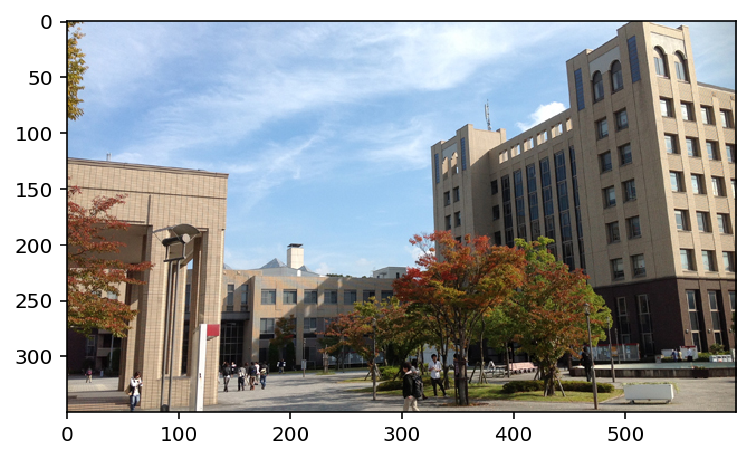

In [12]:
my_img = cv2.imread('./slide01.jpg')
my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2RGB)
plt.imshow(my_img)

In [3]:
#RSA

# STEP 1: Generate Two Large Prime Numbers (p,q) randomly
from random import randrange, getrandbits


def power(a,d,n):
  ans=1;
  while d!=0:
    if d%2==1:
      ans=((ans%n)*(a%n))%n
    a=((a%n)*(a%n))%n
    d>>=1
  return ans;


def MillerRabin(N,d):
  a = randrange(2, N - 1)
  x=power(a,d,N);
  if x==1 or x==N-1:
    return True;
  else:
    while(d!=N-1):
      x=((x%N)*(x%N))%N;
      if x==1:
        return False;
      if x==N-1:
        return True;
      d<<=1;
  return False;


def is_prime(N,K):
  if N==3 or N==2:
    return True;
  if N<=1 or N%2==0:
    return False;
  
  #Find d such that d*(2^r)=X-1
  d=N-1
  while d%2!=0:
    d/=2;

  for _ in range(K):
    if not MillerRabin(N,d):
      return False;
  return True;  
  



def generate_prime_candidate(length):
  # generate random bits
  p = getrandbits(length)
  # apply a mask to set MSB and LSB to 1
  # Set MSB to 1 to make sure we have a Number of 1024 bits.
  # Set LSB to 1 to make sure we get a Odd Number.
  p |= (1 << length - 1) | 1
  return p



def generatePrimeNumber(length):
  A=4
  while not is_prime(A, 128):
        A = generate_prime_candidate(length)
  return A



length=5
P=generatePrimeNumber(length)
Q=generatePrimeNumber(length)

print(P)
print(Q)

17
23


In [4]:
#Step 2: Calculate N=P*Q and Euler Totient Function = (P-1)*(Q-1)
N=P*Q
eulerTotient=(P-1)*(Q-1)
print(N)
print(eulerTotient)

391
352


In [5]:
#Step 3: Find E such that GCD(E,eulerTotient)=1(i.e., e should be co-prime) such that it satisfies this condition:-  1<E<eulerTotient

def GCD(a,b):
  if a==0:
    return b;
  return GCD(b%a,a)

E=generatePrimeNumber(4)
while GCD(E,eulerTotient)!=1:
  E=generatePrimeNumber(4)
print(E)


13


In [6]:
# Step 4: Find D. 
#For Finding D: It must satisfies this property:-  (D*E)Mod(eulerTotient)=1;
#Now we have two Choices
# 1. That we randomly choose D and check which condition is satisfying above condition.
# 2. For Finding D we can Use Extended Euclidean Algorithm: ax+by=1 i.e., eulerTotient(x)+E(y)=GCD(eulerTotient,e)
#Here, Best approach is to go for option 2.( Extended Euclidean Algorithm.)

def gcdExtended(E,eulerTotient):
  a1,a2,b1,b2,d1,d2=1,0,0,1,eulerTotient,E

  while d2!=1:

    # k
    k=(d1//d2)

    #a
    temp=a2
    a2=a1-(a2*k)
    a1=temp

    #b
    temp=b2
    b2=b1-(b2*k)
    b1=temp

    #d
    temp=d2
    d2=d1-(d2*k)
    d1=temp

    D=b2

  if D>eulerTotient:
    D=D%eulerTotient
  elif D<0:
    D=D+eulerTotient

  return D


D=gcdExtended(E,eulerTotient)
print(D)

325


In [7]:
row,col=my_img.shape[0],my_img.shape[1]
enc = [[0 for x in range(3000)] for y in range(3000)]

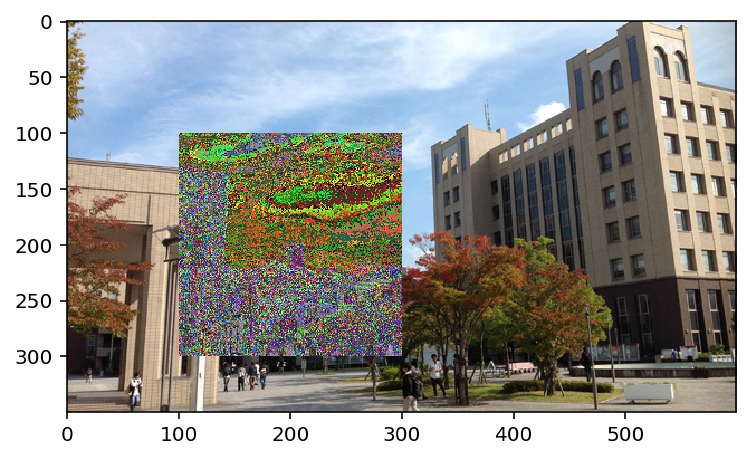

In [10]:
#Step 5: Encryption

for i in range(100,300):
  for j in range(100,300):
    r,g,b=my_img[i,j]
    C1=power(r,E,N)
    C2=power(g,E,N)
    C3=power(b,E,N)
    enc[i][j]=[C1,C2,C3]
    C1=C1%256
    C2=C2%256
    C3=C3%256
    my_img[i,j]=[C1,C2,C3]


plt.imshow(my_img, cmap="gray")
#cv2_imshow(my_img)

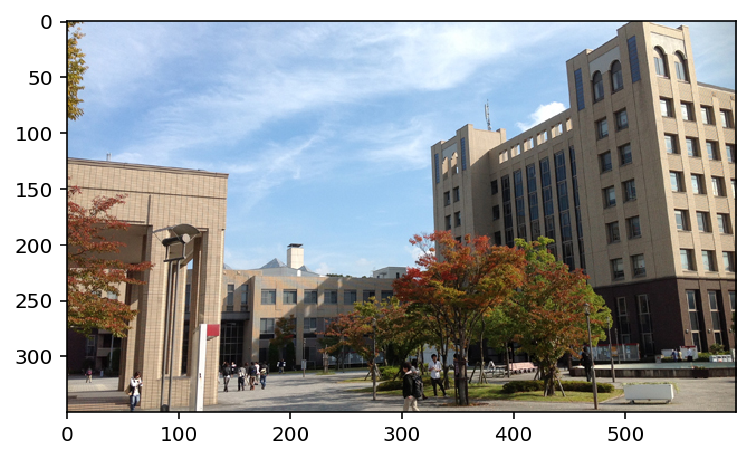

In [11]:
#Step 6: Decryption
for i in range(100,300):
  for j in range(100,300):
    r,g,b=enc[i][j]
    M1=power(r,D,N)
    M2=power(g,D,N)
    M3=power(b,D,N)
    my_img[i,j]=[M1,M2,M3]

plt.imshow(my_img, cmap="gray")